In [13]:
!pip install ultralytics opencv-python matplotlib


In [14]:
import time
import cv2
import matplotlib.pyplot as plt
from ultralytics import SAM

In [15]:
start_load = time.time()
model = SAM('sam_b.pt')   # You can also try 'sam_l.pt' (larger but slower)
end_load = time.time()
print(f"✅ Model loaded in {end_load - start_load:.2f} seconds.")

✅ Model loaded in 3.51 seconds.


In [16]:
image_path = '/content/example3.jpeg'
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError("❌ Image not found. Please check your path!")


In [17]:
h, w = img.shape[:2]
scale = 512 / max(h, w)   # decrease image size to 512px max dimension
if scale < 1:
    img = cv2.resize(img, (int(w*scale), int(h*scale)), interpolation=cv2.INTER_AREA)
cv2.imwrite("resized_input.jpg", img)
image_path = "resized_input.jpg"

In [18]:
start_infer = time.time()
results = model.predict(source=image_path, retina_masks=False, imgsz=640, conf=0.5)
end_infer = time.time()


image 1/1 /content/resized_input.jpg: 640x640 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 263045.0ms
Speed: 13.8ms preprocess, 263045.0ms inference, 12.9ms postprocess per image at shape (1, 3, 640, 640)


In [19]:
print(f"🧠 Inference completed in {end_infer - start_infer:.2f} seconds.")


🧠 Inference completed in 263.15 seconds.


Detected 7 objects in image.


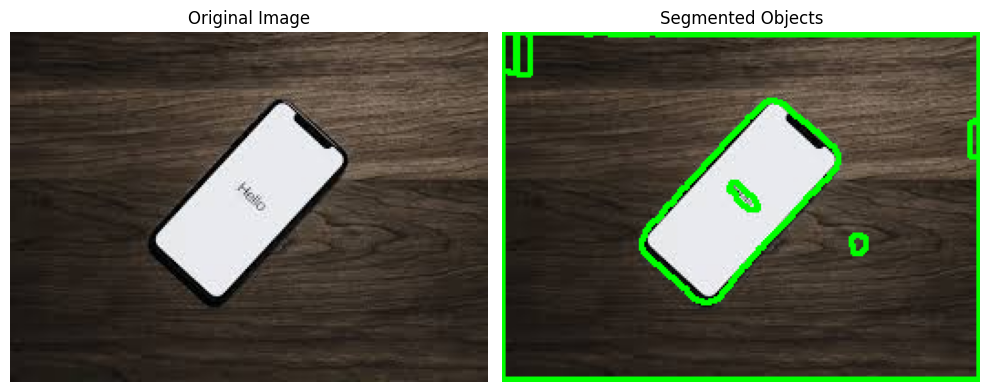

💾 Saved segmented image as segmented_output.jpg


In [21]:
for i, result in enumerate(results):
    # 'result.masks' is a Masks object with binary masks
    if result.masks is None:
        print("⚠️ No masks detected in this image.")
        continue

    masks = result.masks.data.cpu().numpy()  # shape: [num_objects, height, width]
    print(f"Detected {masks.shape[0]} objects in image.")

    # Visualize each mask overlayed on original image
    overlay = img.copy()
    for j, mask in enumerate(masks):
        colored_mask = (mask * 255).astype('uint8')
        contours, _ = cv2.findContours(colored_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(overlay, contours, -1, (0, 255, 0), 2)  # green outlines

    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Segmented Objects")
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    cv2.imwrite("segmented_output.jpg", overlay)
    print("💾 Saved segmented image as segmented_output.jpg")